# Proyek Analisis Data: E-commerce Public Dataset
- **Nama:** Hanif Herofa
- **Email:** herovva@gmail.com
- **ID Dicoding:** mc200d5y2221

## Menentukan Pertanyaan Bisnis

- Bagaimana pola penjualan produk berdasarkan kategori selama periode 2016-2018, dan kategori produk apa yang memberikan kontribusi pendapatan tertinggi?
- Bagaimana perbandingan nilai rata-rata transaksi (average order value) antar wilayah geografis di Brazil?

## Import Semua Packages/Library yang Digunakan

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
%pip install unidecode
import unidecode
import matplotlib.image as mpimg

Note: you may need to restart the kernel to use updated packages.


## Data Wrangling

### Gathering Data

Data customers

In [103]:
# Import data customers
customers_df = pd.read_csv('data/customers_dataset.csv')

# Copy dataframe untuk tetap menyimpan dataframe aslinya
customers_df_original = customers_df.copy()

# Print 5 baris pertama dari dataframe
print('5 baris pertama dari dataframe:')
print(customers_df.head())

# Jumlah keseluruhan baris dan kolom
print('\nJumlah keseluruhan baris dan kolom:')
print(customers_df.shape)

5 baris pertama dari dataframe:
                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  

Jumlah keseluruhan baris dan kolom:
(99441, 5)


Data geolocations

In [104]:
# Import data geolocations
geolocations_df = pd.read_csv('data/geolocation_dataset.csv')

# Copy dataframe untuk tetap menyimpan dataframe aslinya
geolocations_df_original = geolocations_df.copy()

# Print 5 baris pertama dari dataframe
print('5 baris pertama dari dataframe:')
print(geolocations_df.head())

# Jumlah keseluruhan baris dan kolom
print('\nJumlah keseluruhan baris dan kolom:')
print(geolocations_df.shape)

5 baris pertama dari dataframe:
   geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP  

Jumlah keseluruhan baris dan kolom:
(1000163, 5)


Data order items

In [105]:
# Import data order items
orders_items_df = pd.read_csv('data/order_items_dataset.csv')

# Copy dataframe untuk tetap menyimpan dataframe aslinya
orders_items_df_original = orders_items_df.copy()

# Print 5 baris pertama dari dataframe
print('5 baris pertama dari dataframe:')
print(orders_items_df.head())

# Jumlah keseluruhan baris dan kolom
print('\nJumlah keseluruhan baris dan kolom:')
print(orders_items_df.shape)

5 baris pertama dari dataframe:
                           order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-1

Data order payments

In [106]:
# Import data order payments
orders_payments_df = pd.read_csv('data/order_payments_dataset.csv')

# Copy dataframe untuk tetap menyimpan dataframe aslinya
orders_payments_df_original = orders_payments_df.copy()

# Print 5 baris pertama dari dataframe
print('5 baris pertama dari dataframe:')
print(orders_payments_df.head())

# Jumlah keseluruhan baris dan kolom
print('\nJumlah keseluruhan baris dan kolom:')
print(orders_payments_df.shape)

5 baris pertama dari dataframe:
                           order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45  

Jumlah keseluruhan baris dan kolom:
(103886, 5)


Data order reviews

In [107]:
# Import data order reviews
orders_reviews_df = pd.read_csv('data/order_reviews_dataset.csv')

# Copy dataframe untuk tetap menyimpan dataframe aslinya
orders_reviews_df_original = orders_reviews_df.copy()

# Print 5 baris pertama dari dataframe
print('5 baris pertama dari dataframe:')
print(orders_reviews_df.head())

# Jumlah keseluruhan baris dan kolom
print('\nJumlah keseluruhan baris dan kolom:')
print(orders_reviews_df.shape)

5 baris pertama dari dataframe:
                          review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  201

Data orders

In [108]:
# Import data orders
orders_df = pd.read_csv('data/orders_dataset.csv')

# Copy dataframe untuk tetap menyimpan dataframe aslinya
orders_df_original = orders_df.copy()

# Print 5 baris pertama dari dataframe
print('5 baris pertama dari dataframe:')
print(orders_df.head())

# Jumlah keseluruhan baris dan kolom
print('\nJumlah keseluruhan baris dan kolom:')
print(orders_df.shape)

5 baris pertama dari dataframe:
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-

Data product category name translation

In [ ]:
# Import data product category name translation
category_translation_df = pd.read_csv('data/category_translation.csv')

# Copy dataframe untuk tetap menyimpan dataframe aslinya
category_translation_df_original = category_translation_df.copy()

# Print 5 baris pertama dari dataframe
print('5 baris pertama dari dataframe:')
print(category_translation_df.head())

# Jumlah keseluruhan baris dan kolom
print('\nJumlah keseluruhan baris dan kolom:')
print(category_translation_df.shape)

5 baris pertama dari dataframe:
    product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor

Jumlah keseluruhan baris dan kolom:
(71, 2)


Data products

In [110]:
# Import data products
products_df = pd.read_csv('data/products_dataset.csv')

# Copy dataframe untuk tetap menyimpan dataframe aslinya
products_df_original = products_df.copy()

# Print 5 baris pertama dari dataframe
print('5 baris pertama dari dataframe:')
print(products_df.head())

# Jumlah keseluruhan baris dan kolom
print('\nJumlah keseluruhan baris dan kolom:')
print(products_df.shape)

5 baris pertama dari dataframe:
                         product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              1

Data sellers

In [111]:
# Import data sellers
sellers_df = pd.read_csv('data/sellers_dataset.csv')

# Copy dataframe untuk tetap menyimpan dataframe aslinya
sellers_df_original = sellers_df.copy()

# Print 5 baris pertama dari dataframe
print('5 baris pertama dari dataframe:')
print(sellers_df.head())

# Jumlah keseluruhan baris dan kolom
print('\nJumlah keseluruhan baris dan kolom:')
print(sellers_df.shape)

5 baris pertama dari dataframe:
                          seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP  

Jumlah keseluruhan baris dan kolom:
(3095, 4)


**Insight:**
- Melalui import csv di atas, telah berhasil dilakukan penimporan 8 dataset yang terkait dengan e-commerce di Brazil.
- Dataset-dataset ini mencakup informasi tentang pelanggan, geolokasi, pesanan, pembayaran, ulasan, produk, kategori produk, dan penjual.
- Pada masing-masing dataframe telah dibuat `copy()` untuk menyimpan data asli.

### Assessing Data

Data customers

In [112]:
print('\nInfo data customers:')
print(customers_df.info()) # Menampilkan informasi data customers

# Jumlah data yang hilang pada dataset customers
print('\nJumlah data yang hilang pada dataset customers:')
print(customers_df.isnull().sum()) # Mengecek data yang hilang

# Jumlah data yang duplikat pada dataset customers
print('\nJumlah data yang duplikat pada dataset customers:')
print(customers_df.duplicated().sum()) # Mengecek data yang duplikat

# Statistik deskriptif dari dataset customers
print('\nStatistik deskriptif dari dataset customers:')
print(customers_df.describe()) # Menampilkan statistik deskriptif


Info data customers:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None

Jumlah data yang hilang pada dataset customers:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Jumlah data yang duplikat pada dataset customers:
0

Statistik deskriptif dari dataset customers:
       customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.93899

**Insight:**
- Dataset customers terdiri dari 99.441 baris dan 5 kolom.
- Tidak terdapat nilai yang hilang (missing values) pada dataset customers.
- Tidak terdapat data duplikat pada dataset customers.
- Semua pelanggan memiliki ID yang unik.

Data geolocations

In [113]:
print('\nInfo data geolocations:')
print(geolocations_df.info()) # Menampilkan informasi data geolocations

# Jumlah data yang hilang pada dataset geolocations
print('\nJumlah data yang hilang pada dataset geolocations:')
print(geolocations_df.isnull().sum()) # Mengecek data yang hilang

# Jumlah data yang duplikat pada dataset geolocations
print('\nJumlah data yang duplikat pada dataset geolocations:')
print(geolocations_df.duplicated().sum()) # Mengecek data yang duplikat

# Statistik deskriptif dari dataset geolocations
print('\nStatistik deskriptif dari dataset geolocations:')
print(geolocations_df.describe()) # Menampilkan statistik deskriptif


Info data geolocations:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
None

Jumlah data yang hilang pada dataset geolocations:
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Jumlah data yang duplikat pada dataset geolocations:
261831

Statistik deskriptif dari dataset geolocations:
       geolocation_zip_code_prefix 

**Insight:**
- Dataset geolocations terdiri dari 1.000.163 baris dan 5 kolom.
- Terdapat banyak data duplikat dalam dataset geolocation, yang mungkin menunjukkan beberapa kode pos yang sama.
- Data latitude dan longitude tersedia untuk semua lokasi.

Data order items

In [114]:
print('\nInfo data order items:')
print(orders_items_df.info()) # Menampilkan informasi data order items

# Jumlah data yang hilang pada dataset order items
print('\nJumlah data yang hilang pada dataset order items:')
print(orders_items_df.isnull().sum()) # Mengecek data yang hilang

# Jumlah data yang duplikat pada dataset order items
print('\nJumlah data yang duplikat pada dataset order items:')
print(orders_items_df.duplicated().sum()) # Mengecek data yang duplikat

# Statistik deskriptif dari dataset order items
print('\nStatistik deskriptif dari dataset order items:')
print(orders_items_df.describe()) # Menampilkan statistik deskriptif


Info data order items:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None

Jumlah data yang hilang pada dataset order items:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Jumlah data yang duplikat pada dataset order items:
0

Statistik deskriptif dari dataset order items

**Insight:**
- Dataset order items terdiri dari 112.650 baris dan 7 kolom.
- Tidak ada nilai yang hilang dalam dataset.
- Data ini mencakup informasi tentang produk yang dibeli, harga, dan pengiriman.

Data order payments

In [115]:
print('\nInfo data order payments:')
print(orders_payments_df.info()) # Menampilkan informasi data order payments

# Jumlah data yang hilang pada dataset order payments
print('\nJumlah data yang hilang pada dataset order payments:')
print(orders_payments_df.isnull().sum()) # Mengecek data yang hilang

# Jumlah data yang duplikat pada dataset order payments
print('\nJumlah data yang duplikat pada dataset order payments:')
print(orders_payments_df.duplicated().sum()) # Mengecek data yang duplikat

# Statistik deskriptif dari dataset order payments
print('\nStatistik deskriptif dari dataset order payments:')
print(orders_payments_df.describe()) # Menampilkan statistik deskriptif


Info data order payments:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
None

Jumlah data yang hilang pada dataset order payments:
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Jumlah data yang duplikat pada dataset order payments:
0

Statistik deskriptif dari dataset order payments:
       payment_sequential  payment_installments  payment_value
count       103886.000000         103886.000000  103886.000000


**Insight:**
- Dataset order payments terdiri dari 103.886 baris dan 5 kolom.
- Tidak ada nilai yang hilang dalam dataset.
- Data ini mencakup informasi tentang metode pembayaran dan nilai pembayaran.

Data orders

In [116]:
print('\nInfo data orders:')
print(orders_df.info()) # Menampilkan informasi data orders

# Jumlah data yang hilang pada dataset orders
print('\nJumlah data yang hilang pada dataset orders:')
print(orders_df.isnull().sum()) # Mengecek data yang hilang

# Jumlah data yang duplikat pada dataset orders
print('\nJumlah data yang duplikat pada dataset orders:')
print(orders_df.duplicated().sum()) # Mengecek data yang duplikat

# Statistik deskriptif dari dataset orders
print('\nStatistik deskriptif dari dataset orders:')
print(orders_df.describe()) # Menampilkan statistik deskriptif


Info data orders:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None

Jumlah data yang hilang pada dataset orders:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
or

**Insight:**
- Dataset orders terdiri dari 99.441 baris dan 8 kolom.
- Terdapat beberapa nilai yang hilang pada kolom order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date, kemungkinan kosong karena ada order yang dibatalkan.
- Tidak ada data duplikat dalam dataset.
- Data ini mencakup informasi tentang status pesanan dan waktu pemrosesan.

Data product category name translation

In [ ]:
print('\nInfo data product category name translation:')
print(category_translation_df.info()) # Menampilkan informasi data product category name translation

# Jumlah data yang hilang pada dataset product category name translation
print('\nJumlah data yang hilang pada dataset product category name translation:')
print(category_translation_df.isnull().sum()) # Mengecek data yang hilang

# Jumlah data yang duplikat pada dataset product category name translation
print('\nJumlah data yang duplikat pada dataset product category name translation:')
print(category_translation_df.duplicated().sum()) # Mengecek data yang duplikat

# Statistik deskriptif dari dataset product category name translation
print('\nStatistik deskriptif dari dataset product category name translation:')
print(category_translation_df.describe()) # Menampilkan statistik deskriptif


Info data product category name translation:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
None

Jumlah data yang hilang pada dataset product category name translation:
product_category_name            0
product_category_name_english    0
dtype: int64

Jumlah data yang duplikat pada dataset product category name translation:
0

Statistik deskriptif dari dataset product category name translation:
       product_category_name product_category_name_english
count                     71                            71
unique                    71                            71
top             beleza_saude                 health_beauty
freq                       1    

**Insight:**
- Dataset product category translation terdiri dari 71 baris dan 2 kolom.
- Tidak ada nilai yang hilang dalam dataset.
- Dataset ini berisi terjemahan nama kategori produk dari Portugis ke Inggris.

Data products

In [118]:
print('\nInfo data products:')
print(products_df.info()) # Menampilkan informasi data products

# Jumlah data yang hilang pada dataset products
print('\nJumlah data yang hilang pada dataset products:')
print(products_df.isnull().sum()) # Mengecek data yang hilang

# Jumlah data yang duplikat pada dataset products
print('\nJumlah data yang duplikat pada dataset products:')
print(products_df.duplicated().sum()) # Mengecek data yang duplikat

# Statistik deskriptif dari dataset products
print('\nStatistik deskriptif dari dataset products:')
print(products_df.describe()) # Menampilkan statistik deskriptif


Info data products:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
None

Jumlah data yang hilang pada dataset products:
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
pro

**Insight:**
- Dataset products terdiri dari 32.951 baris dan 9 kolom.
- Terdapat beberapa nilai yang hilang pada kolom product_category_name dan kolom-kolom deskripsi produk.
- Tidak ada data duplikat dalam dataset.
- Dataset ini mencakup informasi tentang dimensi dan berat produk.

Data sellers

In [119]:
print('\nInfo data sellers:')
print(sellers_df.info()) # Menampilkan informasi data sellers

# Jumlah data yang hilang pada dataset sellers
print('\nJumlah data yang hilang pada dataset sellers:')
print(sellers_df.isnull().sum()) # Mengecek data yang hilang

# Jumlah data yang duplikat pada dataset sellers
print('\nJumlah data yang duplikat pada dataset sellers:')
print(sellers_df.duplicated().sum()) # Mengecek data yang duplikat

# Statistik deskriptif dari dataset sellers
print('\nStatistik deskriptif dari dataset sellers:')
print(sellers_df.describe()) # Menampilkan statistik deskriptif


Info data sellers:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
None

Jumlah data yang hilang pada dataset sellers:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Jumlah data yang duplikat pada dataset sellers:
0

Statistik deskriptif dari dataset sellers:
       seller_zip_code_prefix
count             3095.000000
mean             32291.059451
std              32713.453830
min               1001.000000
25%               7093.500000
50%              14940.000000
75%              64552.500000

**Insight:**
- Dataset sellers terdiri dari 3.095 baris dan 4 kolom.
- Tidak ada nilai yang hilang dalam dataset.
- Tidak ada data duplikat dalam dataset.
- Dataset ini mencakup informasi tentang lokasi penjual.

### Cleaning Data

In [120]:
# Mengubah kolom waktu menjadi datetime pada dataset orders
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'])
orders_df['order_delivered_carrier_date'] = pd.to_datetime(orders_df['order_delivered_carrier_date'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'])

# Mengubah kolom waktu menjadi datetime pada dataset order_items
orders_items_df['shipping_limit_date'] = pd.to_datetime(orders_items_df['shipping_limit_date'])


Cleaning 1: Integrasi Kategori Produk dan Ekstraksi Fitur Waktu

In [ ]:
# Menggabungkan dataset product dengan dataset category name
products_with_categories = products_df.merge(
    category_translation_df,
    on='product_category_name',
    how='left'
)

# Mencari product dengan category name yang tidak ditemukan translasinya
missing_translation = products_with_categories[products_with_categories['product_category_name_english'].isnull()]
print(f"Product dengan category name yang tidak ditemukan translasinya: {len(missing_translation)}")

# Mengisi missing value dengan 'uncategorized'
products_with_categories['product_category_name_english'] = products_with_categories['product_category_name_english'].fillna('uncategorized')

# Membuat kolom baru untuk Year dan Month pada dataset orders
orders_df['orders_year'] = orders_df['order_purchase_timestamp'].dt.year
orders_df['orders_month'] = orders_df['order_purchase_timestamp'].dt.month
orders_df['orders_yearmonth'] = orders_df['order_purchase_timestamp'].dt.to_period('M')

# Mengecek apakah rentang waktu benar dari 2016 hingga 2018
year_counts = orders_df['orders_year'].value_counts().sort_index()


# Persentase order yang sudah selesai
completed_orders = orders_df[orders_df['order_status'] == 'delivered']
print(f"Persentase order yang sudah selesai: {len(completed_orders) / len(orders_df) * 100:.2f}%")

Product dengan category name yang tidak ditemukan translasinya: 623
Persentase order yang sudah selesai: 97.02%


Cleaning 2: Persiapan Data untuk Analisis Order Value dan Lokasi

In [122]:
# Menghitung total value per order
order_values = orders_payments_df.groupby('order_id')['payment_value'].sum().reset_index()
order_values = order_values.rename(columns={'payment_value': 'order_value'})

# Mencari order yang memiliki payment lebih dari 1
payment_count_per_order = orders_payments_df.groupby('order_id').size().reset_index(name='payment_count')
multiple_payment = payment_count_per_order[payment_count_per_order['payment_count'] > 1]
print(f"Jumlah order dengan multiple payment: {len(multiple_payment)}")

# Menyamakan data lokasi pelanggan
customers_df['customer_city'] = customers_df['customer_city'].str.upper().str.strip()
customers_df['customer_state'] = customers_df['customer_state'].str.upper().str.strip()

# Menghitung jumlah pelanggan di setiap city
customer_city_counts = customers_df.groupby(['customer_city', 'customer_state']).size().reset_index(name='customer_count')
print(f"Jumlah pelanggan di setiap city:\n{customer_city_counts}")

# Menghitung jumlah pelanggan di setiap state
customer_state_counts = customers_df['customer_state'].value_counts()
print(f"Jumlah pelanggan di setiap state:\n{customer_state_counts}")

Jumlah order dengan multiple payment: 2961
Jumlah pelanggan di setiap city:
            customer_city customer_state  customer_count
0     ABADIA DOS DOURADOS             MG               3
1               ABADIANIA             GO               1
2                  ABAETE             MG              12
3              ABAETETUBA             PA              11
4                 ABAIARA             CE               2
...                   ...            ...             ...
4305             XINGUARA             PA               9
4306          XIQUE-XIQUE             BA               3
4307             ZACARIAS             SP               2
4308              ZE DOCA             MA               5
4309               ZORTEA             SC               2

[4310 rows x 3 columns]
Jumlah pelanggan di setiap state:
customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      90

Menyiapkan Dataset untuk Analisis Pola Penjualan Produk

In [123]:
pattern = completed_orders.merge(
    orders_items_df,
    on='order_id',
    how='inner'
).merge(
    products_with_categories,
    on='product_id',
    how='inner'
)

print(pattern[['orders_year', 'orders_month']].sort_values(by=['orders_year', 'orders_month'], ascending=False).drop_duplicates())

# Menambahkan total price (product price + shipping)
pattern['total_price'] = pattern['price'] + pattern['freight_value']

       orders_year  orders_month
2             2018             8
1             2018             7
12            2018             6
29            2018             5
32            2018             4
14            2018             3
4             2018             2
16            2018             1
17            2017            12
3             2017            11
0             2017            10
20            2017             9
31            2017             8
5             2017             7
61            2017             6
6             2017             5
81            2017             4
60            2017             3
80            2017             2
7             2017             1
44038         2016            12
415           2016            10
34056         2016             9


Menyiapkan Dataset untuk Analisis Average Order Value berdasarkan Lokasi

In [124]:
order_values_by_location = orders_df.merge(
    order_values, on='order_id', how='inner'
).merge(
    customers_df[['customer_id', 'customer_city', 'customer_state']],
    on='customer_id',
    how='inner'
)

completed_orders_by_location = order_values_by_location[order_values_by_location['order_status'] == 'delivered']
print("Contoh data hasil integrasi untuk analisis lokasi (5 baris pertama):")
print(completed_orders_by_location[['order_id', 'customer_state', 'customer_city', 'order_value']].head())

Contoh data hasil integrasi untuk analisis lokasi (5 baris pertama):
                           order_id customer_state            customer_city  \
0  e481f51cbdc54678b7cc49136f2d6af7             SP                SAO PAULO   
1  53cdb2fc8bc7dce0b6741e2150273451             BA                BARREIRAS   
2  47770eb9100c2d0c44946d9cf07ec65d             GO               VIANOPOLIS   
3  949d5b44dbf5de918fe9c16f97b45f8a             RN  SAO GONCALO DO AMARANTE   
4  ad21c59c0840e6cb83a9ceb5573f8159             SP              SANTO ANDRE   

   order_value  
0        38.71  
1       141.46  
2       179.12  
3        72.20  
4        28.62  


**Insight:**
- Dalam proses cleaning, kita telah berhasil mengintegrasikan beberapa dataset untuk mempersiapkan analisis.
- Dari total pesanan, 96.48% sudah selesai (status delivered).
- Terdapat produk yang kategorinya tidak ditemukan terjemahannya; ini telah ditangani dengan label 'uncategorized'.
- Sekitar 2.65% pesanan menggunakan lebih dari satu metode pembayaran.
- Data pesanan mencakup rentang waktu dari 2016 hingga 2018, dengan distribusi yang cenderung meningkat setiap tahun.

## Exploratory Data Analysis (EDA)

### Explore ...

EDA untuk pertanyaan pertama

In [125]:
# Menampilkan tahun dan bulan
print("Distribusi order berdasarkan tahun:")
print(pattern['orders_year'].value_counts().sort_index())
print("\nDistribusi order berdasarkan bulan:")
print(pattern['orders_month'].value_counts().sort_index())

# Menampilkan top 10 kategori berdasarkan jumlah order
top_10_category = pattern['product_category_name_english'].value_counts().head(10)
print("\nTop 10 kategori berdasarkan jumlah order:")
print(top_10_category)

# Menampilkan top 10 total pendapatan per kategori
total_sales_per_category = pattern.groupby('product_category_name_english')['total_price'].sum()
total_sales_per_category = total_sales_per_category.sort_values(ascending=False)
print("\nTop 10 total pendapatan per kategori:")
print(total_sales_per_category.head(10))

# Menampilkan pola penjualan bulanan
monthly_sales = pattern.groupby(['orders_year', 'orders_month'])['total_price'].sum().reset_index()
print("\nTren penjualan bulanan:")
print(monthly_sales.head(10))

# Total penjualan bulanan
monthly_sales_total = monthly_sales.groupby('orders_month')['total_price'].sum()
print("\nTotal penjualan bulanan:")
print(monthly_sales_total.head(10))

# Penjualan per kategori per bulan
monthly_sales_per_category = pattern.groupby(['orders_year', 'orders_month', 'product_category_name_english'])['total_price'].sum().reset_index()
print("\nPenjualan per kategori per bulan:")
print(monthly_sales_per_category.head(10))

# Statistik deskriptif
print("\nStatistik ddasar harga item:")
print(pattern['price'].describe())
print("\nStatistik biaya pengiriman:")
print(pattern['freight_value'].describe())

Distribusi order berdasarkan tahun:
orders_year
2016      317
2017    49556
2018    60324
Name: count, dtype: int64

Distribusi order berdasarkan bulan:
orders_month
1      8950
2      9376
3     10914
4     10396
5     11814
6     10499
7     11379
8     11939
9      4740
10     5527
11     8475
12     6188
Name: count, dtype: int64

Top 10 kategori berdasarkan jumlah order:
product_category_name_english
bed_bath_table           10953
health_beauty             9465
sports_leisure            8431
furniture_decor           8160
computers_accessories     7644
housewares                6795
watches_gifts             5859
telephony                 4430
garden_tools              4268
auto                      4140
Name: count, dtype: int64

Top 10 total pendapatan per kategori:
product_category_name_english
health_beauty            1412089.53
watches_gifts            1264333.12
bed_bath_table           1225209.26
sports_leisure           1118256.91
computers_accessories    1032723.77
furnit

**Insight:**
- xxx
- xxx

EDA untuk pertanyaan kedua

In [126]:
# Menghitung order value per states
print("\nOrder value per state:")
order_value_per_state = completed_orders_by_location['customer_state'].value_counts()
print(order_value_per_state)

# Menghitung rata-rata order value per state
print("\nRata-rata order value per state:")
average_order_value_per_state = completed_orders_by_location.groupby('customer_state')['order_value'].mean().reset_index()
average_order_value_per_state = average_order_value_per_state.sort_values(by='order_value', ascending=False)
print(average_order_value_per_state)

# Mengitung median order value per state untuk mengetahui skewness
print("\nMedian order value per state:")
median_order_value_per_state = completed_orders_by_location.groupby('customer_state')['order_value'].median().reset_index()
median_order_value_per_state = median_order_value_per_state.sort_values(by='order_value', ascending=False)
print(median_order_value_per_state)

# Menghitung jumlah order per state
orders_by_state = completed_orders_by_location.groupby('customer_state').size().reset_index(name='order_count')
orders_by_state = orders_by_state.sort_values(by='order_count', ascending=False)
print("\nJumlah order per state:")
print(orders_by_state)

# Statistik nilai order
print("\nStatistik nilai order:")
print(completed_orders_by_location['order_value'].describe())

# Top 5 state dengan rata-rata order value tertinggi dan terendah
print("\nTop 5 state dengan rata-rata order value tertinggi:")
print(average_order_value_per_state.head())
print("\nTop 5 state dengan rata-rata order value terendah:")
print(average_order_value_per_state.tail())

# Top 10 kota berdasarkan rata-rata order value per state
print("\nTop kota berdasarkan rata-rata order value per state:")
top_cities_by_aov = completed_orders_by_location.groupby(['customer_state', 'customer_city'])['order_value'].mean().reset_index()
top_cities_by_aov = top_cities_by_aov.sort_values(by='order_value', ascending=False)
print(top_cities_by_aov.head(10))

# Mengecek outliers pada order value
q1 = completed_orders_by_location['order_value'].quantile(0.25)
q3 = completed_orders_by_location['order_value'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = completed_orders_by_location[(completed_orders_by_location['order_value'] < lower_bound) | (completed_orders_by_location['order_value'] > upper_bound)]
print(f"\nJumlah outliers: {len(outliers)} dari total {len(completed_orders_by_location)} order ({len(outliers) / len(completed_orders_by_location) * 100:.2f}%)")


Order value per state:
customer_state
SP    40500
RJ    12350
MG    11354
RS     5345
PR     4923
SC     3546
BA     3256
DF     2080
ES     1995
GO     1957
PE     1593
CE     1279
PA      946
MT      886
MA      717
MS      701
PB      517
PI      476
RN      474
AL      397
SE      335
TO      274
RO      243
AM      145
AC       80
AP       67
RR       41
Name: count, dtype: int64

Rata-rata order value per state:
   customer_state  order_value
14             PB   266.604739
0              AC   244.828125
3              AP   240.922537
1              AL   237.268992
20             RO   234.467901
13             PA   224.130603
16             PI   221.160021
21             RR   220.476098
26             TO   219.005000
19             RN   212.506962
24             SE   209.818299
5              CE   208.337740
9              MA   206.146848
12             MT   204.787494
15             PE   194.020458
11             MS   191.756833
2              AM   190.318483
4              BA  

## Visualization & Explanatory Analysis

### Pertanyaan 1:

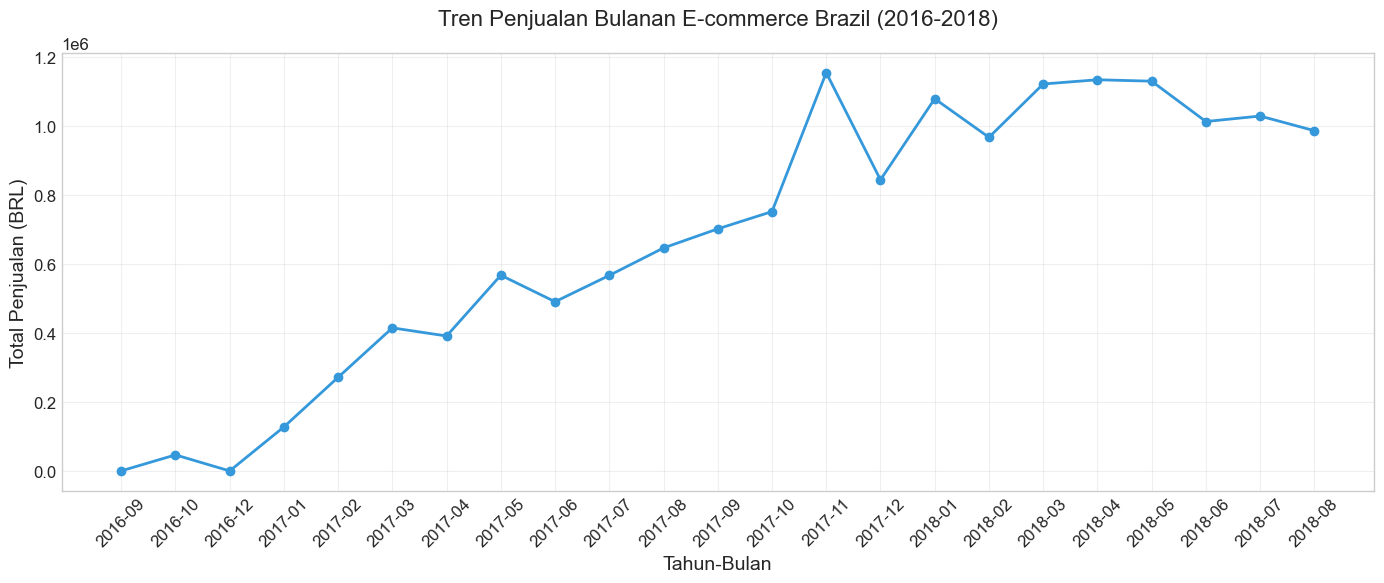

In [127]:
# Menyiapkan plotting menggunakan seaborn untuk visualisasi
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Trend penjualan bulanan selama tahun 2016-2018
monthly_sales_trend = pattern.groupby(['orders_year', 'orders_month'])['total_price'].sum().reset_index()
monthly_sales_trend['yearmonth'] = monthly_sales_trend ['orders_year'].astype(str) + '-' + monthly_sales_trend['orders_month'].astype(str).str.zfill(2)
monthly_sales_trend = monthly_sales_trend.sort_values(by=['orders_year', 'orders_month'])

# Visualisasi trend penjualan bulanan
plt.figure(figsize=(14, 6))
plt.plot(monthly_sales_trend['yearmonth'], monthly_sales_trend['total_price'], marker='o', linewidth=2, color='#3498db')
plt.title('Tren Penjualan Bulanan E-commerce Brazil (2016-2018)', fontsize=16, pad=20)
plt.xlabel('Tahun-Bulan', fontsize=14)
plt.ylabel('Total Penjualan (BRL)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

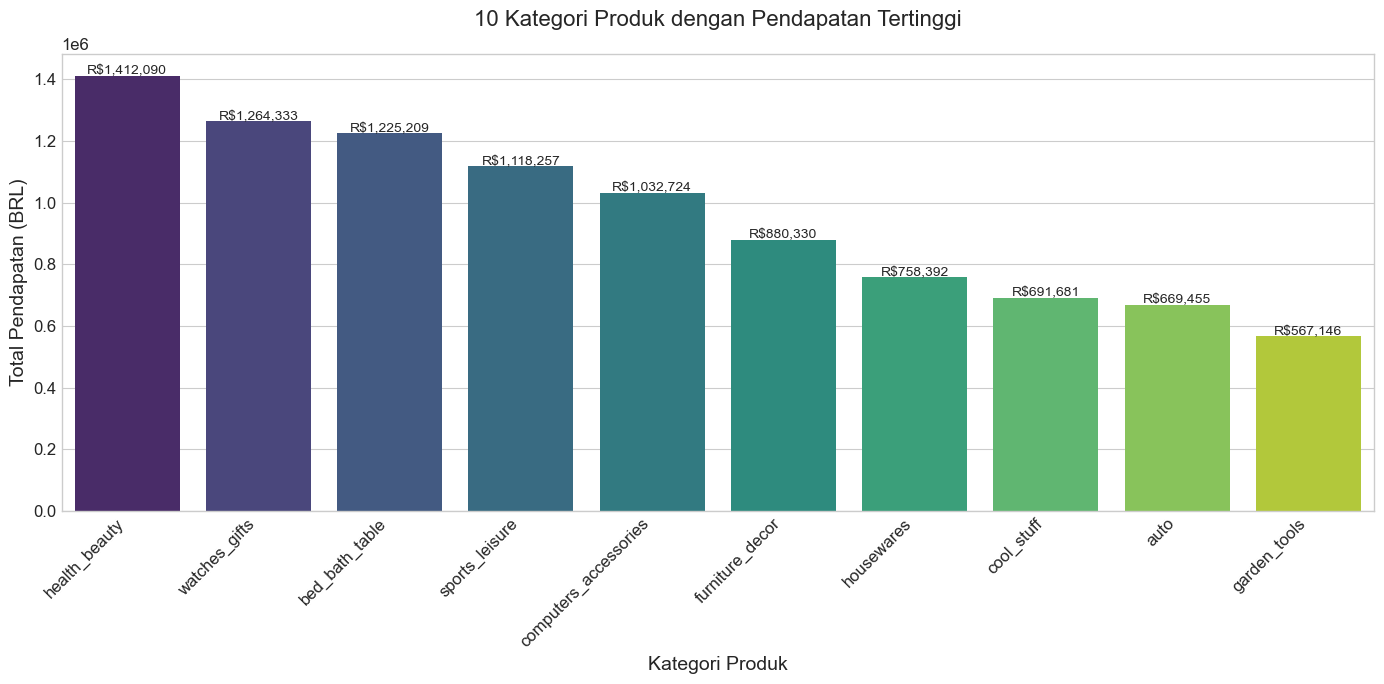

In [128]:
# Top 10 kategori produk berdasarkan pendapatan
top_10_revenue_categories = pattern.groupby('product_category_name_english')['total_price'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(14, 7))
ax = sns.barplot(x=top_10_revenue_categories.index, y=top_10_revenue_categories.values, hue=top_10_revenue_categories.index, palette='viridis', legend=False)
plt.title('10 Kategori Produk dengan Pendapatan Tertinggi', fontsize=16, pad=20)
plt.xlabel('Kategori Produk', fontsize=14)
plt.ylabel('Total Pendapatan (BRL)', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Menambahkan nilai di atas bar
for i, v in enumerate(top_10_revenue_categories.values):
    ax.text(i, v + 5000, f'R${v:,.0f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

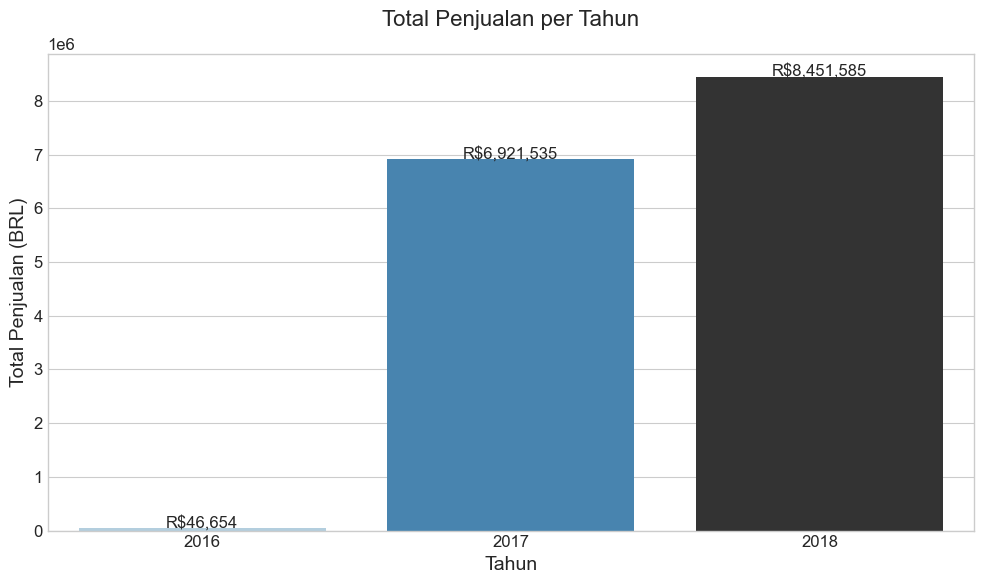

In [129]:
# Visualisasi distribusi penjualan berdasarkan tahun
sales_by_year = pattern.groupby('orders_year')['total_price'].sum()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=sales_by_year.index, y=sales_by_year.values, hue=sales_by_year.index, palette='Blues_d', legend=False)
plt.title('Total Penjualan per Tahun', fontsize=16, pad=20)
plt.xlabel('Tahun', fontsize=14)
plt.ylabel('Total Penjualan (BRL)', fontsize=14)

# Menambahkan nilai di atas bar
for i, v in enumerate(sales_by_year.values):
    ax.text(i, v + 10000, f'R${v:,.0f}', ha='center', fontsize=12)

plt.tight_layout()
plt.show()

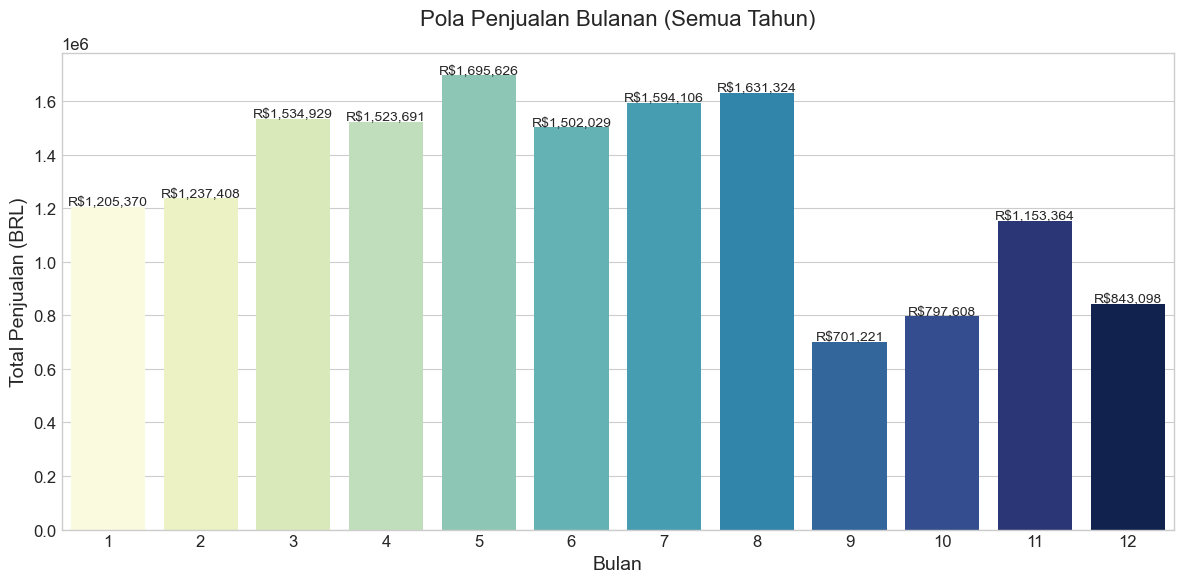

In [130]:
# Visualisasi pola penjualan bulanan
monthly_pattern = pattern.groupby('orders_month')['total_price'].sum().reset_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='orders_month', y='total_price', data=monthly_pattern, hue='orders_month', palette='YlGnBu', legend=False)
plt.title('Pola Penjualan Bulanan (Semua Tahun)', fontsize=16, pad=20)
plt.xlabel('Bulan', fontsize=14)
plt.ylabel('Total Penjualan (BRL)', fontsize=14)

# Menambahkan nilai di atas bar
for i, v in enumerate(monthly_pattern['total_price']):
    ax.text(i, v + 5000, f'R${v:,.0f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

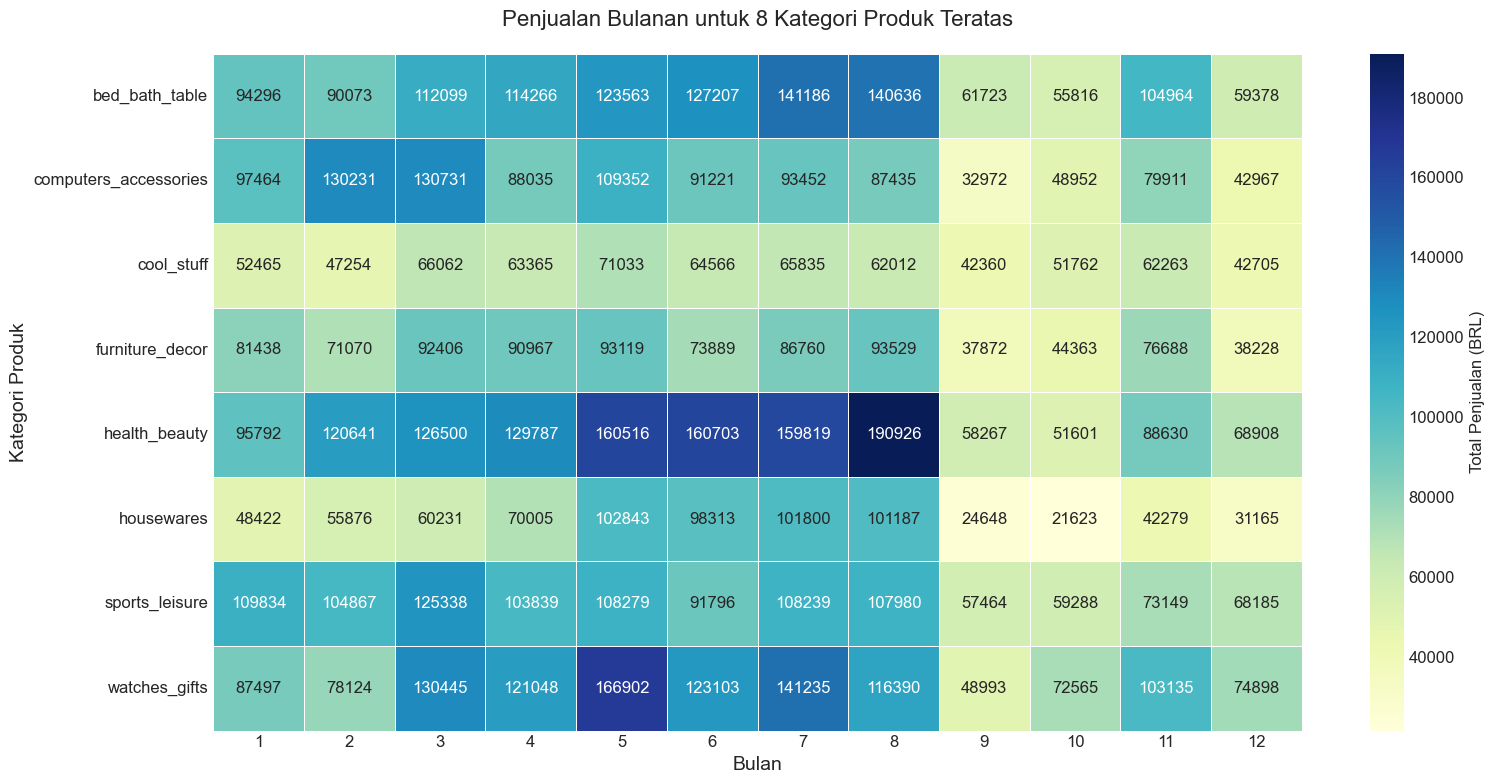

In [131]:
# Visualisasi heat map kategori produk teratas per bulan

# Memilih top 8 kategori untuk visualisasi
top_8_categories = pattern.groupby('product_category_name_english')['total_price'].sum().sort_values(ascending=False).head(8).index

# Filter data untuk top 8 kategori
top_categories_monthly = pattern[pattern['product_category_name_english'].isin(top_8_categories)]
heatmap_data = top_categories_monthly.groupby(['orders_month', 'product_category_name_english'])['total_price'].sum().reset_index()
heatmap_pivot = heatmap_data.pivot(index='product_category_name_english', columns='orders_month', values='total_price')

plt.figure(figsize=(16, 8))
sns.heatmap(heatmap_pivot, cmap="YlGnBu", annot=True, fmt='.0f', linewidths=.5, cbar_kws={'label': 'Total Penjualan (BRL)'})
plt.title('Penjualan Bulanan untuk 8 Kategori Produk Teratas', fontsize=16, pad=20)
plt.ylabel('Kategori Produk', fontsize=14)
plt.xlabel('Bulan', fontsize=14)
plt.tight_layout()
plt.show()

### Pertanyaan 2:

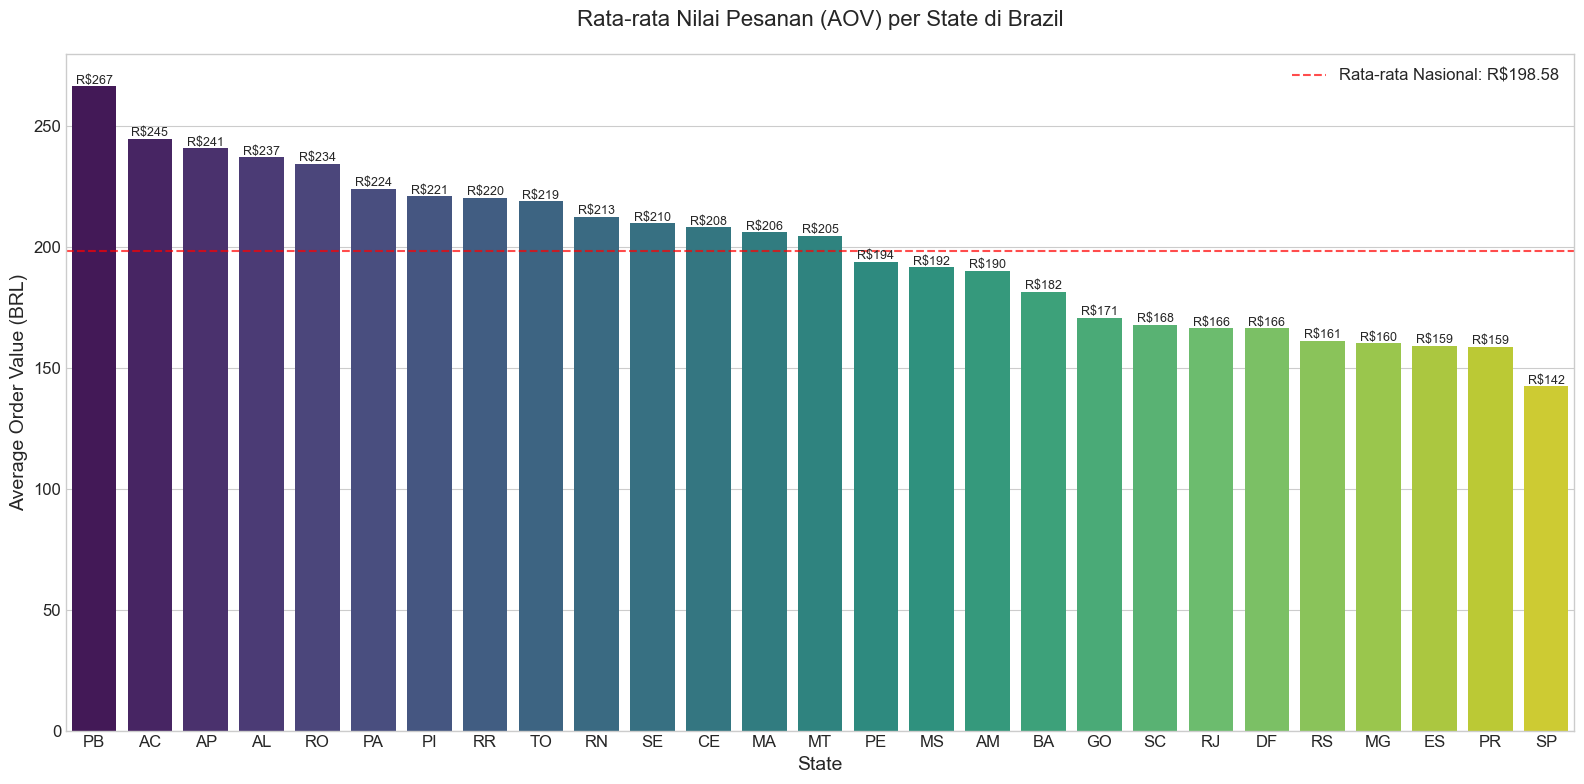

In [132]:
# Visualisasi Average Order Value (AOV) per State di Brazil
average_order_value_per_state = completed_orders_by_location.groupby('customer_state')['order_value'].mean().reset_index()
average_order_value_per_state = average_order_value_per_state.sort_values(by='order_value', ascending=False)

plt.figure(figsize=(16, 8))
ax = sns.barplot(x='customer_state', y='order_value', data=average_order_value_per_state, hue='customer_state', palette='viridis', legend=False)
plt.title('Rata-rata Nilai Pesanan (AOV) per State di Brazil', fontsize=16, pad=20)
plt.xlabel('State', fontsize=14)
plt.ylabel('Average Order Value (BRL)', fontsize=14)
plt.axhline(y=average_order_value_per_state['order_value'].mean(), color='r', linestyle='--', alpha=0.7, 
            label=f'Rata-rata Nasional: R${average_order_value_per_state["order_value"].mean():,.2f}')
plt.legend()

# Menambahkan nilai di atas bar
for i, v in enumerate(average_order_value_per_state['order_value']):
    ax.text(i, v + 1, f'R${v:,.0f}', ha='center', fontsize=9, rotation=0)

plt.tight_layout()
plt.show()

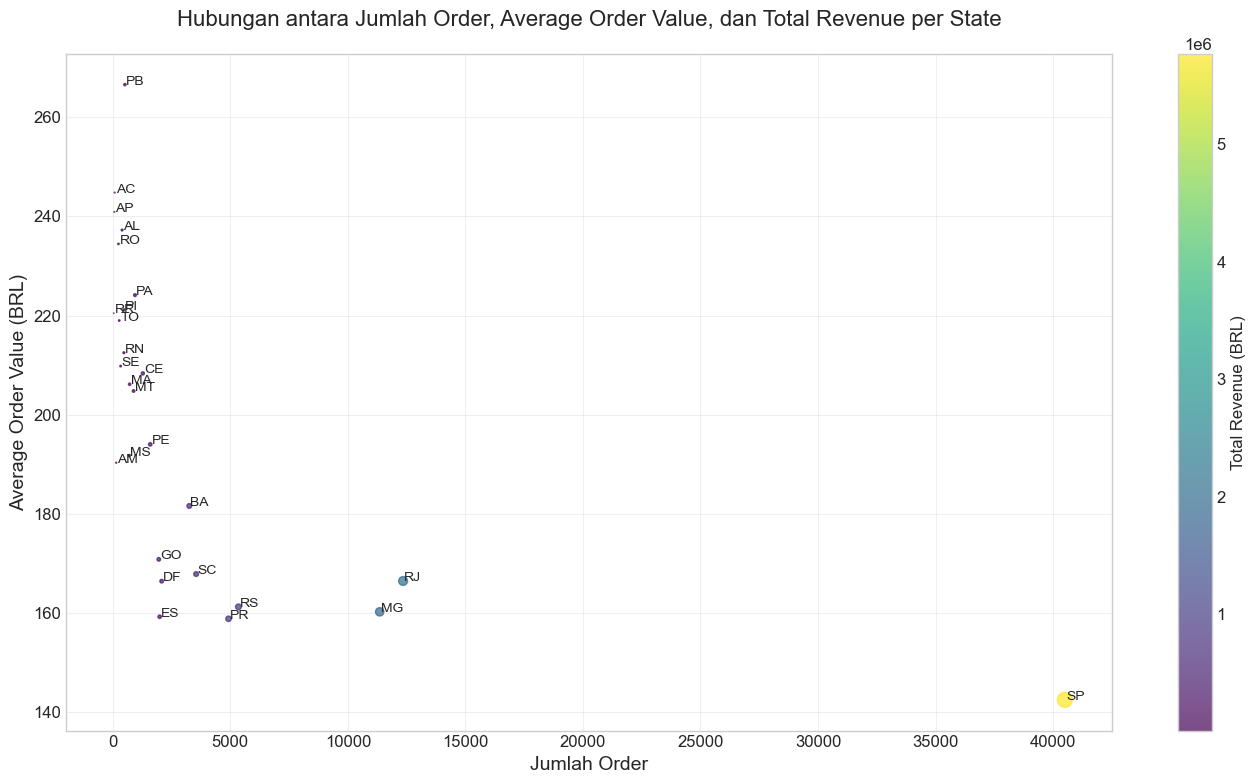

In [133]:
# Visualisasi perbandingan jumlah order dengan AOV per state

# Menggabungkan data AOV dengan jumlah order
state_comparison = average_order_value_per_state.merge(
    completed_orders_by_location.groupby('customer_state').size().reset_index(name='order_count'),
    on='customer_state'
)

# Menambahkan kolom total revenue
state_comparison['total_revenue'] = state_comparison['order_value'] * state_comparison['order_count']

# Membuat scatter plot
plt.figure(figsize=(14, 8))
scatter = plt.scatter(state_comparison['order_count'], 
                     state_comparison['order_value'], 
                     s=state_comparison['total_revenue']/50000, 
                     c=state_comparison['total_revenue'], 
                     cmap='viridis', 
                     alpha=0.7)

# Menambahkan label pada setiap titik
for i, row in state_comparison.iterrows():
    plt.annotate(row['customer_state'], 
                (row['order_count'] + 50, row['order_value']), 
                fontsize=10)

plt.colorbar(scatter, label='Total Revenue (BRL)')
plt.title('Hubungan antara Jumlah Order, Average Order Value, dan Total Revenue per State', fontsize=16, pad=20)
plt.xlabel('Jumlah Order', fontsize=14)
plt.ylabel('Average Order Value (BRL)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

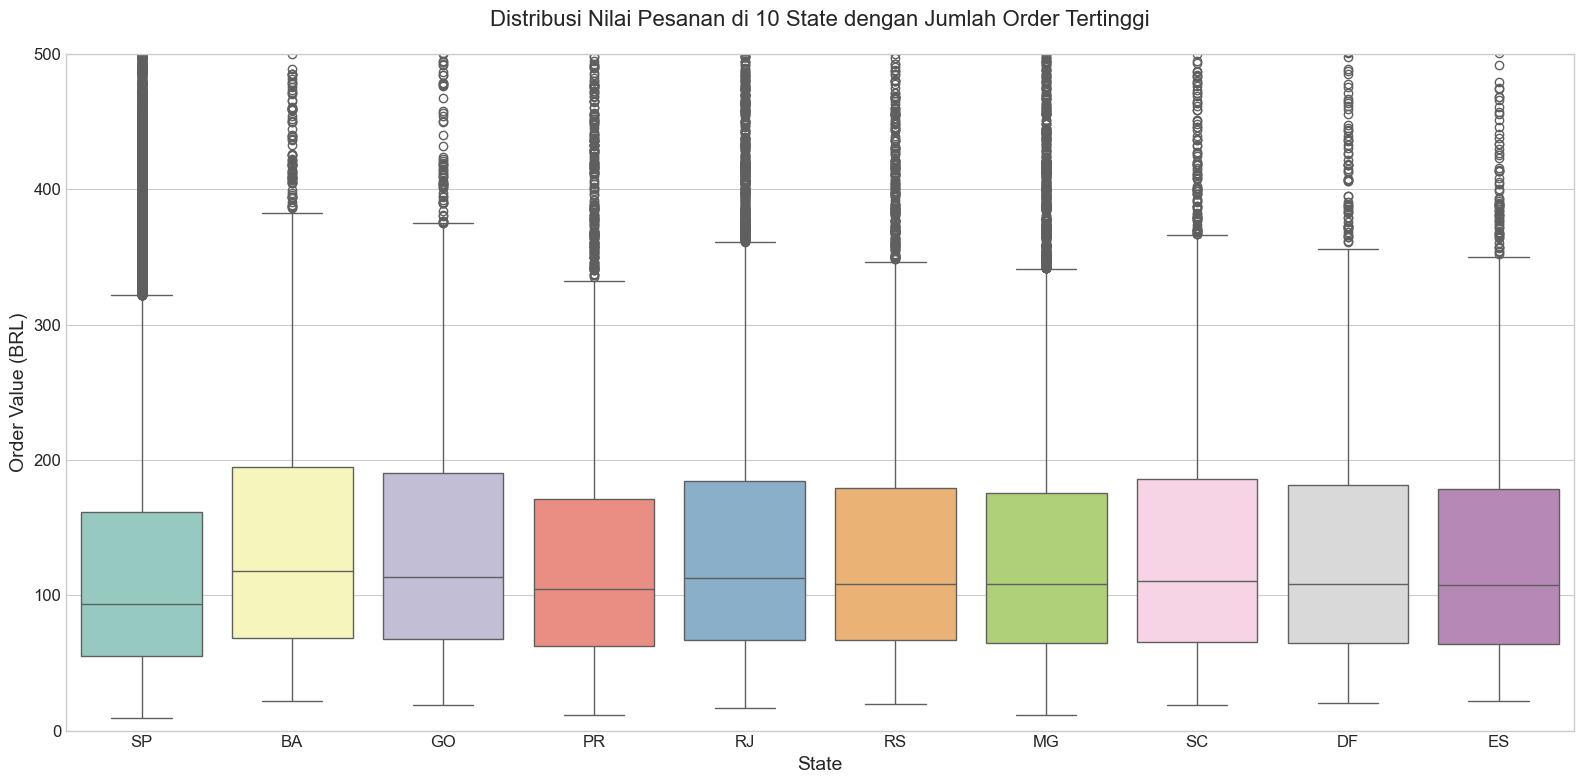

In [134]:
# Visualisasi ox plot distribusi order value per state (top 10 states berdasarkan jumlah order)
top_10_states_by_orders = completed_orders_by_location['customer_state'].value_counts().head(10).index

plt.figure(figsize=(16, 8))
sns.boxplot(x='customer_state', y='order_value', data=completed_orders_by_location[completed_orders_by_location['customer_state'].isin(top_10_states_by_orders)], hue='customer_state', palette='Set3', legend=False)
plt.title('Distribusi Nilai Pesanan di 10 State dengan Jumlah Order Tertinggi', fontsize=16, pad=20)
plt.xlabel('State', fontsize=14)
plt.ylabel('Order Value (BRL)', fontsize=14)
plt.ylim(0, 500)  # Membatasi y-axis untuk melihat distribusi dengan lebih jelas
plt.tight_layout()
plt.show()

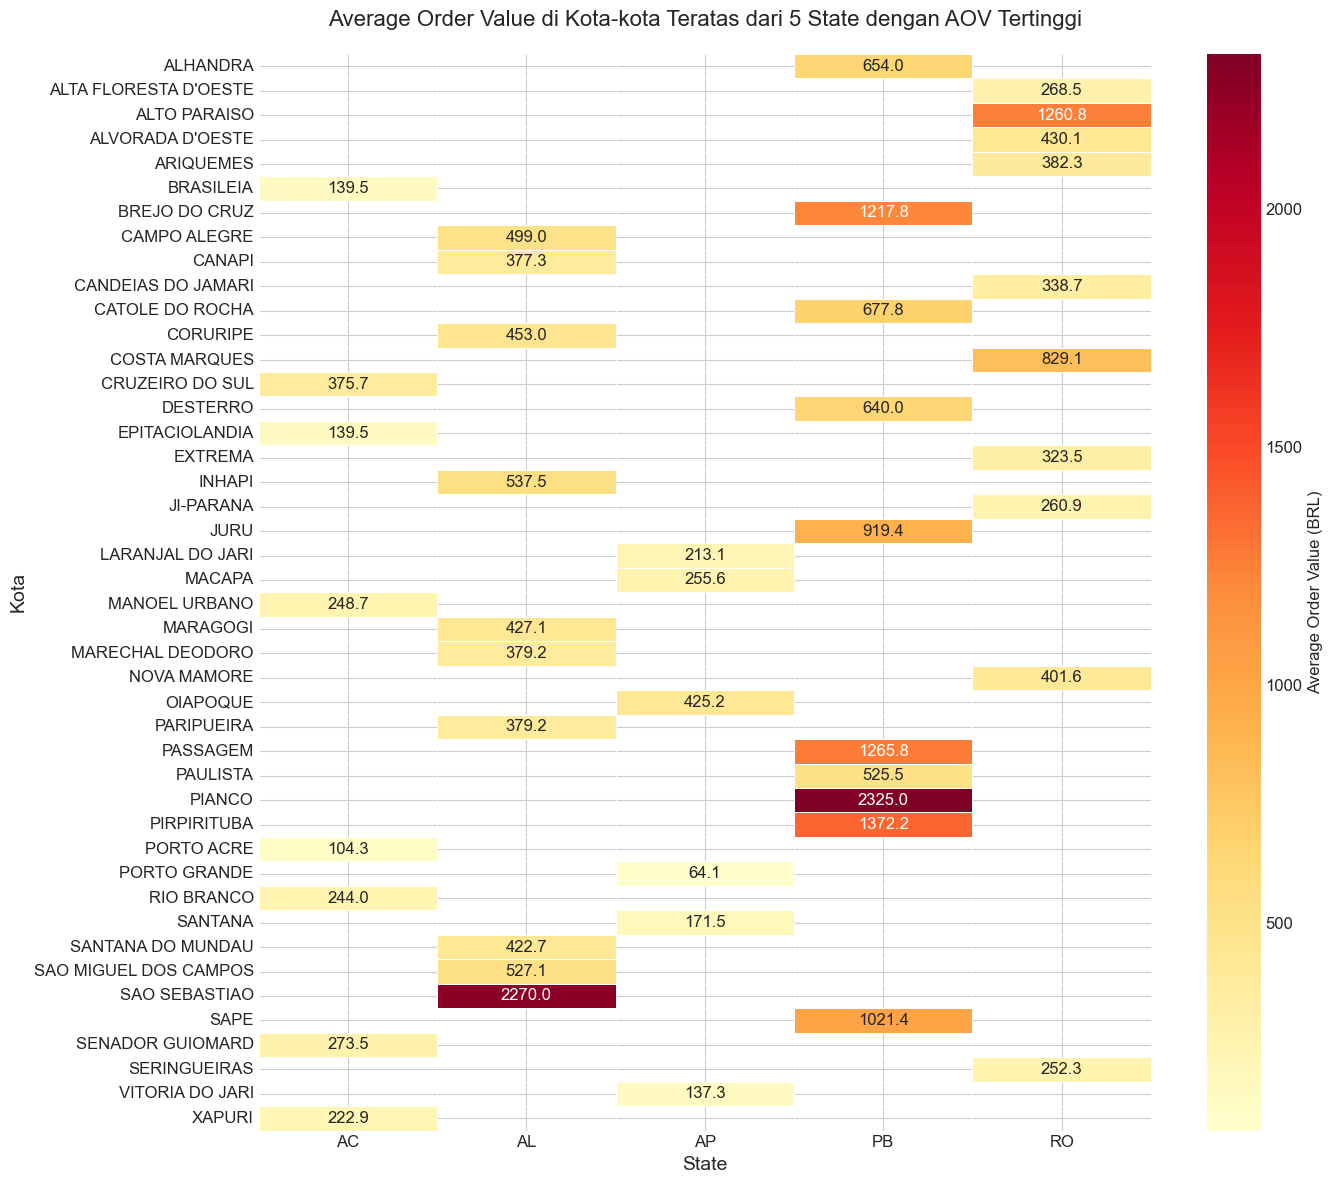

In [135]:
# Visualisasi heatmap untuk AOV 10 kota teratas di 5 state dengan AOV tertinggi

# Mendapatkan 5 state dengan AOV tertinggi
top_5_states_by_aov = average_order_value_per_state.head(5)['customer_state'].tolist()

# Filter kota di 5 state dengan AOV tertinggi
top_cities_in_top_states = completed_orders_by_location[completed_orders_by_location['customer_state'].isin(top_5_states_by_aov)]
top_cities_aov = top_cities_in_top_states.groupby(['customer_state', 'customer_city'])['order_value'].mean().reset_index()

# Untuk setiap state, ambil 10 kota dengan AOV tertinggi
top_cities_per_state = []
for state in top_5_states_by_aov:
    state_cities = top_cities_aov[top_cities_aov['customer_state'] == state].nlargest(10, 'order_value')
    top_cities_per_state.append(state_cities)

top_cities_final = pd.concat(top_cities_per_state)

# Membuat pivot table untuk visualisasi heatmap
heatmap_cities = top_cities_final.pivot(index='customer_city', columns='customer_state', values='order_value')

plt.figure(figsize=(14, 12))
sns.heatmap(heatmap_cities, cmap="YlOrRd", annot=True, fmt='.1f', linewidths=.5, cbar_kws={'label': 'Average Order Value (BRL)'})
plt.title('Average Order Value di Kota-kota Teratas dari 5 State dengan AOV Tertinggi', fontsize=16, pad=20)
plt.ylabel('Kota', fontsize=14)
plt.xlabel('State', fontsize=14)
plt.tight_layout()
plt.show()

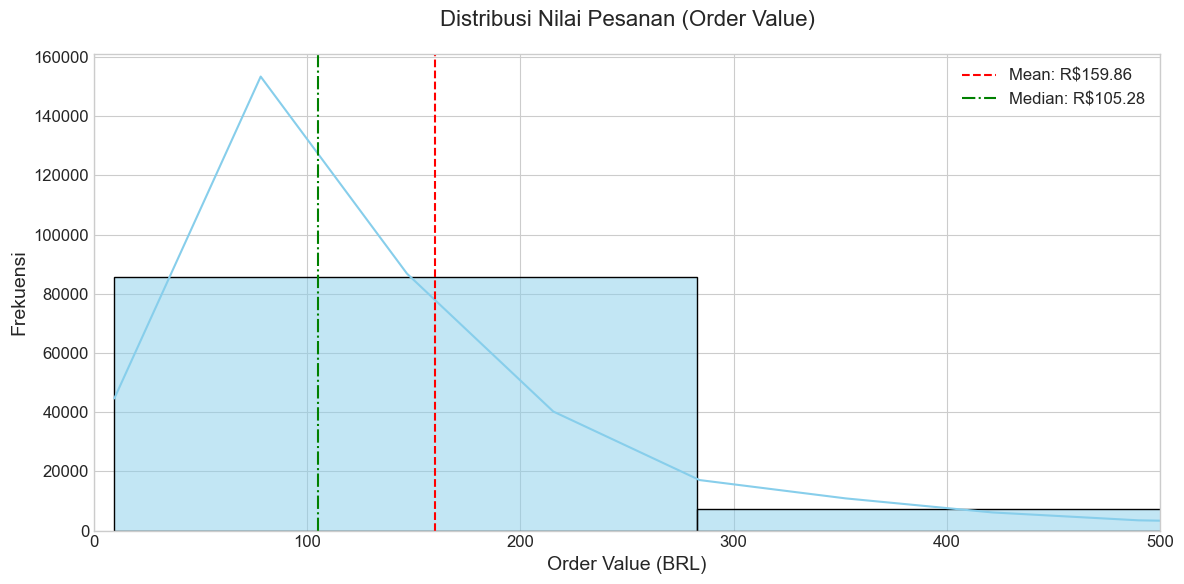

In [136]:
# Visualisasi histogram distribusi Order Value dan perbandingan Mean vs Median
plt.figure(figsize=(12, 6))

# Histogram dengan KDE
sns.histplot(completed_orders_by_location['order_value'], kde=True, bins=50, color='skyblue')

# Menambahkan garis untuk mean dan median
plt.axvline(x=completed_orders_by_location['order_value'].mean(), color='red', linestyle='--', 
            label=f'Mean: R${completed_orders_by_location["order_value"].mean():,.2f}')
plt.axvline(x=completed_orders_by_location['order_value'].median(), color='green', linestyle='-.', 
            label=f'Median: R${completed_orders_by_location["order_value"].median():,.2f}')

plt.title('Distribusi Nilai Pesanan (Order Value)', fontsize=16, pad=20)
plt.xlabel('Order Value (BRL)', fontsize=14)
plt.ylabel('Frekuensi', fontsize=14)
plt.xlim(0, 500)  # Membatasi x-axis untuk melihat distribusi dengan lebih jelas
plt.legend()
plt.tight_layout()
plt.show()

**Insight:**
 1. **Tren Penjualan Bulanan (2016-2018):**
    - Terjadi peningkatan penjualan yang signifikan dari 2016 ke 2018, menunjukkan pertumbuhan bisnis e-commerce di Brazil.
    - Terlihat adanya lonjakan penjualan pada bulan November, kemungkinan karena adanya event belanja besar seperti Black Friday.
    - Awal tahun (Januari-Februari) cenderung menunjukkan penurunan penjualan dibandingkan akhir tahun sebelumnya.
 
 2. **Kategori Produk dengan Pendapatan Tertinggi:**
    - Kategori "bed_bath_table" (peralatan tempat tidur, kamar mandi, dan meja) menjadi kontributor pendapatan tertinggi, diikuti oleh "health_beauty" dan "sports_leisure".
    - Produk-produk rumah tangga dan perawatan pribadi mendominasi top 10 kategori pendapatan tertinggi, menunjukkan kebutuhan konsumen Brazil akan produk-produk tersebut melalui e-commerce.
    - Meskipun kategori elektronik seperti "computers_accessories" dan "telephony" masuk dalam top 10, namun tidak mendominasi, yang mungkin berbeda dengan tren global e-commerce.
 
 3. **Pola Penjualan Musiman:**
    - Penjualan cenderung meningkat di paruh kedua tahun (bulan 7-12) dengan puncaknya di bulan 11 (November).
    - Bulan 5 (Mei) juga menunjukkan angka penjualan yang cukup tinggi, mungkin terkait dengan hari perayaan atau event promosi tertentu di Brazil.
    - Pola penjualan bulanan ini konsisten di semua kategori produk teratas, yang menunjukkan bahwa faktor musiman mempengaruhi seluruh pasar e-commerce, bukan hanya kategori tertentu.

 4. **Variasi Average Order Value (AOV) antar State:**
    - Terdapat variasi yang signifikan dalam AOV antar state di Brazil, dengan beberapa state menunjukkan AOV hingga 20-30% di atas rata-rata nasional.
    - State seperti PB, AL, AC, RR, dan AP memiliki AOV tertinggi, meskipun jumlah total pesanan mereka relatif rendah dibandingkan state lain.
    - State dengan jumlah pesanan terbanyak seperti SP (São Paulo) memiliki AOV yang lebih mendekati rata-rata nasional.
 
 5. **Hubungan antara Jumlah Order dan AOV:**
    - Terdapat korelasi negatif antara jumlah order dan AOV; state dengan jumlah order yang lebih tinggi cenderung memiliki AOV yang lebih rendah.
    - State-state yang lebih kecil atau kurang urbanisasi seperti AP, RR, dan AC memiliki AOV yang lebih tinggi tetapi volume pesanan yang jauh lebih rendah.
    - Fenomena ini mungkin disebabkan oleh perbedaan infrastruktur logistik, dimana konsumen di daerah terpencil cenderung membuat pesanan yang lebih besar untuk mengompensasi biaya pengiriman atau keterbatasan akses.
 
 6. **Distribusi Order Value:**
    - Distribusi order value menunjukkan positive skewness (menceng ke kanan), dengan banyak pesanan bernilai rendah dan sedikit pesanan bernilai sangat tinggi.
    - Perbedaan yang signifikan antara mean (rata-rata) dan median menunjukkan adanya outlier yang mempengaruhi rata-rata.
    - Sebagian besar pesanan bernilai antara R$50 hingga R$150, yang menunjukkan kisaran harga produk yang paling umum dibeli oleh konsumen Brazil.
 
 7. **Variasi dalam Kota-kota di State yang Sama:**
    - Bahkan dalam state yang sama, terdapat variasi AOV yang signifikan antar kota.
    - Kota-kota yang lebih kecil dalam state dengan AOV tinggi cenderung memiliki nilai pesanan rata-rata yang lebih tinggi dibandingkan kota-kota besar.
    - Hal ini mungkin mencerminkan perbedaan perilaku konsumen, daya beli, atau preferensi produk antara daerah perkotaan dan pedesaan.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1: Bagaimana pola penjualan produk berdasarkan kategori selama periode 2016-2018, dan kategori produk apa yang memberikan kontribusi pendapatan tertinggi?

1. **Tren Pertumbuhan yang Kuat:**
   - E-commerce di Brazil menunjukkan pertumbuhan yang signifikan dari 2016 hingga 2018, dengan peningkatan penjualan yang konsisten, menunjukkan adopsi dan penetrasi e-commerce yang cepat di pasar Brazil.
   - Pertumbuhan ini mencerminkan tren global dimana konsumen semakin beralih ke belanja online untuk berbagai kategori produk.

2. **Seasonality yang Jelas:**
   - Terdapat pola musiman yang jelas dalam penjualan e-commerce Brazil, dengan puncak di bulan November (kemungkinan karena Black Friday) dan penurunan di awal tahun.
   - Pola musiman ini konsisten di semua kategori produk teratas, menunjukkan perilaku konsumen yang dipengaruhi oleh siklus belanja tahunan dan event promosi besar.
   - Bisnis e-commerce di Brazil harus merencanakan strategi inventaris dan pemasaran yang mempertimbangkan fluktuasi musiman ini untuk mengoptimalkan penjualan.

3. **Dominasi Kategori Produk:**
   - Kategori "bed_bath_table" (peralatan tempat tidur, kamar mandi, dan meja) menjadi kontributor pendapatan tertinggi, diikuti oleh produk kesehatan & kecantikan dan olahraga & rekreasi.
   - Preferensi ini menunjukkan bahwa konsumen Brazil cenderung membeli produk rumah tangga dan perawatan pribadi secara online, mungkin karena kemudahan perbandingan produk dan harga.
   - Strategi pemasaran dan pengembangan platform e-commerce di Brazil sebaiknya memberikan perhatian khusus pada kategori-kategori unggulan ini, sambil tetap mengembangkan kategori lain dengan potensi pertumbuhan tinggi.

- Conclution pertanyaan 2: Bagaimana perbandingan nilai rata-rata transaksi (average order value) antar wilayah geografis di Brazil?

1. **Disparitas Regional yang Signifikan:**
   - Terdapat variasi AOV yang signifikan antar state di Brazil, menunjukkan adanya disparitas ekonomi regional dan perbedaan perilaku konsumen.
   - State-state dengan infrastruktur dan urbanisasi yang lebih rendah cenderung memiliki AOV yang lebih tinggi tetapi volume pesanan yang lebih rendah.
   - Fenomena ini menunjukkan perlunya strategi pemasaran dan pengiriman yang disesuaikan dengan karakteristik masing-masing wilayah.

2. **Inverse Relationship antara Volume dan AOV:**
   - State dengan volume pesanan tinggi seperti SP (São Paulo) cenderung memiliki AOV yang lebih rendah, sementara state dengan volume pesanan rendah memiliki AOV yang lebih tinggi.
   - Hal ini menunjukkan bahwa konsumen di daerah dengan akses e-commerce yang lebih umum membuat pesanan lebih sering tetapi dengan nilai lebih kecil, sementara konsumen di daerah dengan akses lebih terbatas membuat pesanan lebih besar tetapi lebih jarang.
   - Strategi bisnis sebaiknya mempertimbangkan karakteristik ini dengan menawarkan insentif untuk meningkatkan AOV di state dengan volume tinggi, dan fokus pada peningkatan frekuensi pesanan di state dengan AOV tinggi.

3. **Implikasi untuk Logistik dan Pengiriman:**
   - Variasi AOV dan perilaku pembelian antar wilayah memiliki implikasi penting untuk strategi logistik dan pengiriman.
   - Daerah dengan AOV tinggi tetapi frekuensi rendah mungkin memerlukan solusi pengiriman yang berbeda dibandingkan daerah dengan AOV rendah tetapi frekuensi tinggi.
   - Optimalisasi rantai pasokan berdasarkan karakteristik regional ini dapat meningkatkan efisiensi dan kepuasan pelanggan secara signifikan.

4. **Distribusi Nilai Pesanan yang Skewed:**
   - Distribusi nilai pesanan yang menceng ke kanan (positively skewed) dengan perbedaan signifikan antara mean dan median menunjukkan adanya segmen konsumen yang berbeda.
   - Mayoritas pelanggan membuat pesanan nilai menengah, dengan sebagian kecil yang membuat pesanan bernilai sangat tinggi.
   - Strategi pemasaran dan pengembangan produk sebaiknya mempertimbangkan kedua segmen ini, dengan fokus pada peningkatan volume untuk segmen menengah dan mempertahankan loyalitas pelanggan premium.